In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [3]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/기획경영_전처리/경영기획전략.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,신규 개발 중인 헬스케어 서비스의 POProduct Owner로서 기획 및 운영 ...,PC Mobile 웹 앱등의 환경에서 3년 이상 서비스 기획을 경험 하신 분 특...
1,이런 팀에서 일을 합니다 사업개발팀은 사업확대를 위해 반도체 관련 사업기회를 발굴...,신사업 기획 및 관리 15년 이상 경력이 필요합니다팀을 리드한 5년이상 팀장경력을...
2,합류하여 담당하실 업무입니다 전사 경영전략 경영계획 전략과제를 수립합니다 전사 KP...,이런 역량과 경험을 갖추신 분을 찾습니다 5년 이상 10년 이하의 경영 관리 경력을...
3,플랫폼 사업 운영 및 지표매출손익 관리 플랫폼 운영 단의 경영계획 수립 및 실적 관...,경영관리매출손익 및 경영기획전략기획 관련 업무 경험 57년 이상 보유자 온라인 커...
4,고객이 Jober를 사용하면서 문의하는 것에 대해 안내하고 이를 기록해 요청이 많...,B2B B2C IT Service에 이해도가 높고 IT 시스템 사용에 능숙한 분...
...,...,...
89,채용직급 차부장급 1명 분야 컨슈머 및 헬스케어 비즈니스 전사 영업 사업전략 기획...,학력 대졸 이상 4년경력 업무 경력 10년 이상어학 영어회화 가능자 경영 및 ...
90,MGRV가 전개하는 다양한 형태의 사업의 수익성 개선 및 고객 만족도 제고를 위한 ...,기업의 PL 지표에 대한 이해를 바탕으로 수익성 개선을 위한 과제 정의가 가능하...
91,사업기획 사업전략 및 사업계획 수립 대외협력국내외 관련업체 IR 홍보...,전장업체 경력자 전자컴퓨터정보통신 관련 전공자 시장과 기술에 대한 이해도가 높은 ...
92,알파브라더스 IR 팀으로 합류하시면 크리에이티브 소속으로 다음과 같은 일을 합니다 ...,이런 분과 함께 하고 싶어요 한글 PPT 엑셀 등 OA 툴 사용이 가능한 분 원활...


In [5]:
#사용할 column 선택
df = df[['주요 업무']]
df

,주요 업무
0,신규 개발 중인 헬스케어 서비스의 POProduct Owner로서 기획 및 운영 ...
1,이런 팀에서 일을 합니다 사업개발팀은 사업확대를 위해 반도체 관련 사업기회를 발굴...
2,합류하여 담당하실 업무입니다 전사 경영전략 경영계획 전략과제를 수립합니다 전사 KP...
3,플랫폼 사업 운영 및 지표매출손익 관리 플랫폼 운영 단의 경영계획 수립 및 실적 관...
4,고객이 Jober를 사용하면서 문의하는 것에 대해 안내하고 이를 기록해 요청이 많...
...,...
89,채용직급 차부장급 1명 분야 컨슈머 및 헬스케어 비즈니스 전사 영업 사업전략 기획...
90,MGRV가 전개하는 다양한 형태의 사업의 수익성 개선 및 고객 만족도 제고를 위한 ...
91,사업기획 사업전략 및 사업계획 수립 대외협력국내외 관련업체 IR 홍보...
92,알파브라더스 IR 팀으로 합류하시면 크리에이티브 소속으로 다음과 같은 일을 합니다 ...


In [6]:
#txt로 저장
i = 'C:/Users/User/Desktop/기획경영_전처리/경영기획전략(주요업무).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [7]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'주요 업무\n 신규 개발 중인 헬스케어 서비스의 POProduct Owner로서 기획 및 운영 서비스 시나리오 설계 및 화면구성 프로덕트서비스사용자 경험 디자인\n이런 팀에서 일을 합니다  사업개발팀은 사업확대를 위해 반도체 관련 사업기회를 발굴하며 MA 및 사업투자검토를 진행합니다 사업기획 특허 법무 국책과제 담당자가 협업하여 업무를 수행합니다 반도체 산업에 대한 시장분석 경쟁사 또는 인수대상기업에 대해 기술가치평가를 통해 사업기회를 찾습니다이런 업무를 합니다  신사업을 기획 및 사업전략을 수립합니다 기업의 비전을 검토하고 방향성을 수립합니다 신사업에 대한 투자 타상성을 분석하고 평가합니다 투자사를 분석합니다 신규사업을 위한 선행기술을 조합니다 신규사업을 위한 기술 및 사업성을 평가합니다 사내 신규사업의 기술로드맵을 작성합니다 경영기획을 수행합니다 경영비전 및 경영전략을 수립합니다 중장기 전략 및 장단기 사업계획을 수립합니다 연도별 경영분석 및 지표를 산출합니다 법무 특허업무를 총괄합니다 계약서를 검토합니다 경영분쟁 및 소송이슈 발생시 대응합니다 신사업 기술을 분석합니다 사내 특허 출원유지보상 프로세스를 수립합니다 본사 및 자회사 특허를 출원합니다 특허 분쟁 발생시 대응합니다\n합류하여 담당하실 업무입니다 전사 경영전략 경영계획 전략과제를 수립합니다 전사 KPI를 관리하고 분석합니다  예산관리결산사업 성과와 손익을 분석합니다 경영실적 성과 분석 및 전략과제 진척도를 점검합니다 경영진 의사결정 위한 제반 정보를 제공합니다 주요 이슈를 대응하고 주주경영진과의 커뮤니케이션을 담당합니다\n플랫폼 사업 운영 및 지표매출손익 관리 플랫폼 운영 단의 경영계획 수립 및 실적 관리 연간월간 계획 수립 플랫폼 매출 데이터 분석 통한 향후 운영 전략 수립 계획 기반 팀별 달성 목표 수립 및 관리 손익 추정 및 지표 관리 시장경쟁사 분석 및 벤치마킹 자료 분석\n 고객이 Jober를 사용하면서 문의하는 것에 대해 안내하고 이를 기록해 요청이 많은 사항을 UX에 반영 또는 가이드

In [8]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['주요',
 '업무',
 '신규',
 '개발',
 '중인',
 '헬',
 '스케',
 '서비스',
 '로서',
 '기획',
 '및',
 '운영',
 '서비스',
 '시나리오',
 '설계',
 '및',
 '화면',
 '구성',
 '프로',
 '덕트',
 '서비스',
 '사용자',
 '경험',
 '디자인',
 '팀',
 '일',
 '사업',
 '개발',
 '팀',
 '사업',
 '확대',
 '위해',
 '반도체',
 '관련',
 '사업',
 '기회',
 '발굴',
 '및',
 '사업',
 '투자',
 '검토',
 '진행',
 '사업',
 '기획',
 '특허',
 '법무',
 '국책',
 '과제',
 '담당자',
 '협업',
 '업무',
 '수행',
 '반도체',
 '산업',
 '대한',
 '시장',
 '분석',
 '경쟁',
 '사',
 '인수',
 '대상',
 '기업',
 '대해',
 '기술',
 '가치',
 '평가',
 '통해',
 '사업',
 '기회',
 '업무',
 '사업',
 '기획',
 '및',
 '사업',
 '전략',
 '수립',
 '기업',
 '검토',
 '방향성',
 '수립',
 '사업',
 '대한',
 '투자',
 '타상',
 '분석',
 '평가',
 '투자',
 '분석',
 '신규',
 '사업',
 '위',
 '선행',
 '기술',
 '조합',
 '니',
 '신규',
 '사업',
 '위',
 '기술',
 '및',
 '사업',
 '평가',
 '사내',
 '신규',
 '사업',
 '기술',
 '로드맵',
 '작성',
 '영기획',
 '수행',
 '경영',
 '및',
 '전략',
 '수립',
 '중',
 '장기',
 '전략',
 '및',
 '장',
 '단기',
 '사업',
 '계획',
 '수립',
 '연도',
 '별',
 '경영',
 '분석',
 '및',
 '지표',
 '산출',
 '법무',
 '특허',
 '업무',
 '총괄',
 '계약서',
 '검토',
 '경영',
 '분쟁',
 '및',
 '소송',
 '이슈',
 '발생',
 '시',
 '대응',

In [9]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

4794
679


FreqDist({'및': 333, '사업': 158, '관리': 138, '운영': 122, '수립': 107, '분석': 106, '전략': 93, '업무': 80, '계획': 79, '기획': 73, ...})

In [10]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [15]:
stop_words = [
    '실행','수립','사요','작성','문제','우수','능력','관련','이상','기반','비즈니스','활용','스타트업','역량','사업','우대','이해도','보유','업무','대한','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '경험', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['주요',
 '신규',
 '개발',
 '중인',
 '헬',
 '스케',
 '서비스',
 '로서',
 '기획',
 '운영',
 '서비스',
 '시나리오',
 '설계',
 '화면',
 '구성',
 '프로',
 '덕트',
 '서비스',
 '사용자',
 '디자인',
 '개발',
 '확대',
 '위해',
 '반도체',
 '기회',
 '발굴',
 '투자',
 '검토',
 '진행',
 '기획',
 '특허',
 '법무',
 '국책',
 '과제',
 '담당자',
 '협업',
 '수행',
 '반도체',
 '산업',
 '시장',
 '분석',
 '경쟁',
 '사',
 '인수',
 '대상',
 '기업',
 '대해',
 '기술',
 '가치',
 '평가',
 '통해',
 '기회',
 '기획',
 '전략',
 '기업',
 '검토',
 '방향성',
 '투자',
 '타상',
 '분석',
 '평가',
 '투자',
 '분석',
 '신규',
 '선행',
 '기술',
 '조합',
 '니',
 '신규',
 '기술',
 '평가',
 '사내',
 '신규',
 '기술',
 '로드맵',
 '영기획',
 '수행',
 '경영',
 '전략',
 '중',
 '장기',
 '전략',
 '장',
 '단기',
 '계획',
 '연도',
 '별',
 '경영',
 '분석',
 '지표',
 '산출',
 '법무',
 '특허',
 '총괄',
 '계약서',
 '검토',
 '경영',
 '분쟁',
 '소송',
 '이슈',
 '발생',
 '시',
 '대응',
 '기술',
 '분석',
 '사내',
 '특허',
 '출원',
 '유지',
 '보상',
 '프로세스',
 '본사',
 '자회사',
 '특허',
 '출원',
 '특허',
 '분쟁',
 '발생',
 '시',
 '대응',
 '합류',
 '담당',
 '전사',
 '경영',
 '전략',
 '경영',
 '계획',
 '전략',
 '과제',
 '전사',
 '를',
 '관리',
 '분석',
 '예산',
 '관리',
 '결산',
 '성과',
 '손익',
 '분석',
 '경영',
 '실적',
 '성과'

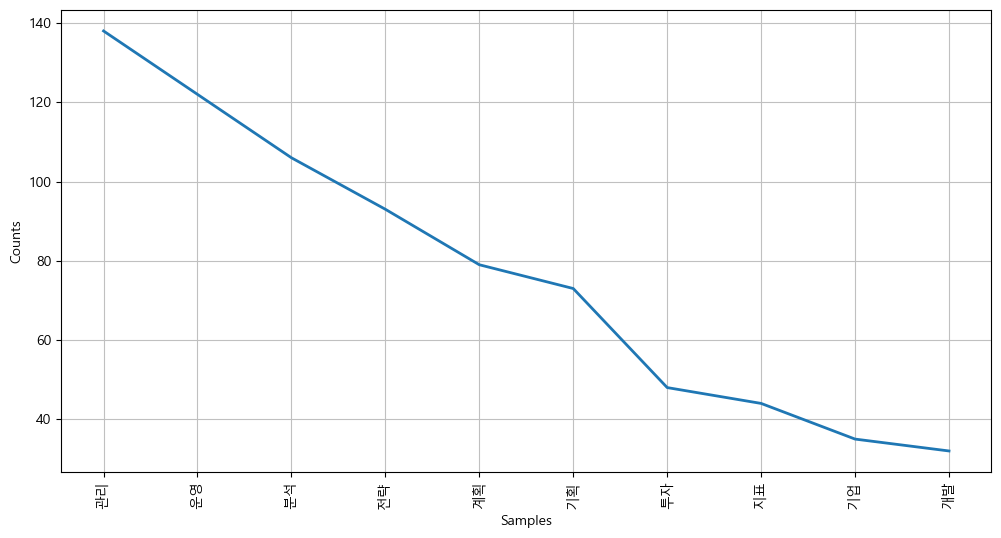

In [16]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()